验证集准确率: 0.8172
Pclass: 0.1963
Sex: 0.4844
Age: 0.1394
SibSp: 0.0826
Parch: 0.0000
Fare: 0.0973
Embarked: 0.0000


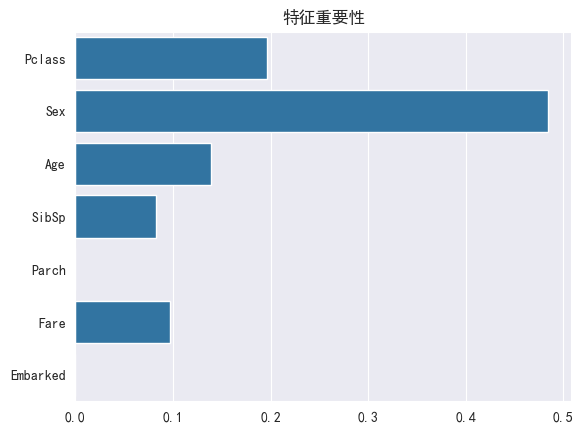

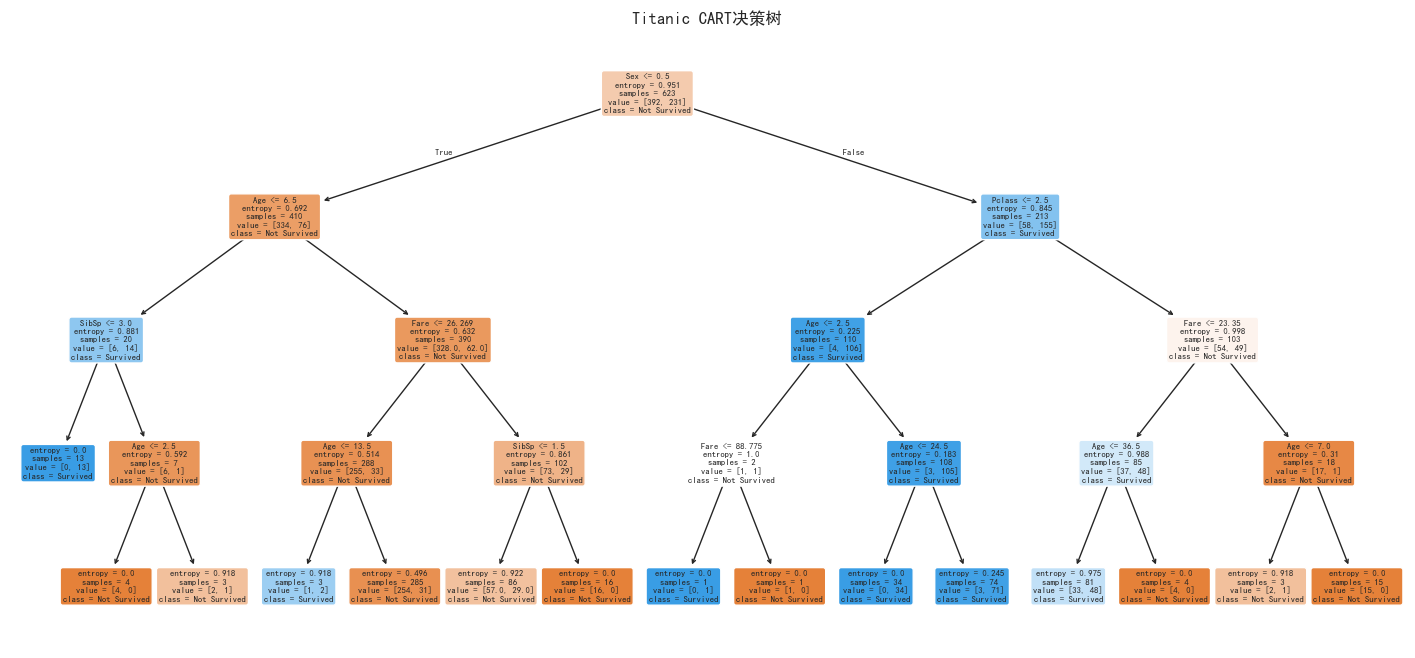

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib

# 数据导入
titanic = pd.read_csv('data/train.csv')
test_data = pd.read_csv('data/test.csv')

# 数据清洗与预处理
titanic.set_index('PassengerId', inplace=True)
titanic.drop('Cabin', axis=1, inplace=True)
titanic['Age'] = titanic['Age'].fillna(titanic['Age'].median())
titanic['Sex'] = titanic['Sex'].map({'male': 0, 'female': 1})
titanic['Embarked'] = titanic['Embarked'].fillna(titanic['Embarked'].mode()[0])
titanic['Embarked'] = titanic['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})
titanic['Fare'] = titanic['Fare'].fillna(titanic['Fare'].median())

test_data.set_index('PassengerId', inplace=True)
test_data.drop('Cabin', axis=1, inplace=True)
test_data['Age'] = test_data['Age'].fillna(test_data['Age'].median())
test_data['Sex'] = test_data['Sex'].map({'male': 0, 'female': 1})
test_data['Embarked'] = test_data['Embarked'].fillna(test_data['Embarked'].mode()[0])
test_data['Embarked'] = test_data['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})
test_data['Fare'] = test_data['Fare'].fillna(test_data['Fare'].median())

# 可视化配置
matplotlib.rcParams['font.sans-serif'] = ['SimHei']
matplotlib.rcParams['axes.unicode_minus'] = False

# 特征与目标
predictors = ['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']
target = 'Survived'

# 划分训练集
X_train, X_valid, y_train, y_valid = train_test_split(
    titanic[predictors], titanic[target], test_size=0.3, random_state=42
)

# 决策树模型
tree_model = DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=42)
tree_model.fit(X_train, y_train)

# 验证模型
y_pred = tree_model.predict(X_valid)
acc = accuracy_score(y_valid, y_pred)
print(f"验证集准确率: {acc:.4f}")

# 特征重要性
importance = tree_model.feature_importances_
for f, imp in zip(predictors, importance):
    print(f"{f}: {imp:.4f}")

# 可视化特征重要性
sns.barplot(x=importance, y=predictors)
plt.title("特征重要性")
plt.show()

# 绘制决策树
plt.figure(figsize=(18,8))
plot_tree(tree_model,
          feature_names=predictors,
          class_names=['Not Survived', 'Survived'],
          filled=True,
          rounded=True)
plt.title("Titanic CART决策树")
plt.show()

# 测试集预测
X_test_extra = test_data[predictors]
test_predictions = tree_model.predict(X_test_extra)
